In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Where

In [3]:
# where(tensor)

a = tf.random.normal([3, 3])
print(a)

tf.Tensor(
[[-0.49008724 -0.3052527  -1.1943786 ]
 [-1.3676696   0.46230447 -1.3825337 ]
 [ 1.0508596   1.5404701  -0.74451196]], shape=(3, 3), dtype=float32)


In [4]:
mask = a>0
print(mask)

tf.Tensor(
[[False False False]
 [False  True False]
 [ True  True False]], shape=(3, 3), dtype=bool)


In [5]:
tf.boolean_mask(a, mask)

W0712 17:17:51.276740  5320 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py:1340: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<tf.Tensor: id=42, shape=(3,), dtype=float32, numpy=array([0.46230447, 1.0508596 , 1.5404701 ], dtype=float32)>

In [7]:
indices = tf.where(mask)
print(indices)

tf.Tensor(
[[1 1]
 [2 0]
 [2 1]], shape=(3, 2), dtype=int64)


In [8]:
tf.gather_nd(a, indices)

<tf.Tensor: id=47, shape=(3,), dtype=float32, numpy=array([0.46230447, 1.0508596 , 1.5404701 ], dtype=float32)>

In [9]:
# where (cond, A, B), true from A, false from B
mask

<tf.Tensor: id=14, shape=(3, 3), dtype=bool, numpy=
array([[False, False, False],
       [False,  True, False],
       [ True,  True, False]])>

In [10]:
A = tf.ones([3, 3])

In [11]:
B = tf.zeros([3, 3])

In [12]:
tf.where(mask, A, B)

<tf.Tensor: id=56, shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

## scatter_nd

In [13]:
# shape 底版, 默认全是0
# indices
# updates 数值

indices = tf.constant([[4], [3], [1], [7]])

In [15]:
updates = tf.constant([9, 10, 11, 12])

In [16]:
shape = tf.constant([8])
print(shape)

tf.Tensor([8], shape=(1,), dtype=int32)


In [17]:
tf.scatter_nd(indices, updates, shape)

<tf.Tensor: id=62, shape=(8,), dtype=int32, numpy=array([ 0, 11,  0, 10,  9,  0,  0, 12])>

In [18]:
indices = tf.constant([[0], [2]])

In [19]:
updates = tf.constant([ [[5, 5, 5, 5], [6, 6, 6, 6],
                         [7, 7, 7, 7], [8, 8, 8, 8]],
                       
                         [[5, 5, 5, 5], [6, 6, 6, 6],
                         [7, 7, 7, 7], [8, 8, 8, 8]] ])

In [20]:
updates.shape

TensorShape([2, 4, 4])

In [21]:
shape = tf.constant([4, 4, 4])

In [22]:
tf.scatter_nd(indices, updates, shape)

<tf.Tensor: id=67, shape=(4, 4, 4), dtype=int32, numpy=
array([[[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]])>

## meshgrid

In [37]:
points = []

for y in np.linspace(-2, 2, 5):
    for x in np.linspace(-2, 2, 5):
        points.append([x, y])
    
np.array(points)

array([[-2., -2.],
       [-1., -2.],
       [ 0., -2.],
       [ 1., -2.],
       [ 2., -2.],
       [-2., -1.],
       [-1., -1.],
       [ 0., -1.],
       [ 1., -1.],
       [ 2., -1.],
       [-2.,  0.],
       [-1.,  0.],
       [ 0.,  0.],
       [ 1.,  0.],
       [ 2.,  0.],
       [-2.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [-2.,  2.],
       [-1.,  2.],
       [ 0.,  2.],
       [ 1.,  2.],
       [ 2.,  2.]])

In [38]:
print(np.array(points).shape)

(25, 2)


In [28]:
# GPU acceleration

y = tf.linspace(-2., 2, 5)

In [29]:
x = tf.linspace(-2., 2, 5)

In [30]:
points_x, points_y = tf.meshgrid(x, y)

In [31]:
points_x.shape

TensorShape([5, 5])

In [32]:
points_x

<tf.Tensor: id=95, shape=(5, 5), dtype=float32, numpy=
array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]], dtype=float32)>

In [33]:
points_y

<tf.Tensor: id=96, shape=(5, 5), dtype=float32, numpy=
array([[-2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.]], dtype=float32)>

In [34]:
# 合并维度
points = tf.stack([points_x, points_y], axis=2)

In [35]:
print(points)

tf.Tensor(
[[[-2. -2.]
  [-1. -2.]
  [ 0. -2.]
  [ 1. -2.]
  [ 2. -2.]]

 [[-2. -1.]
  [-1. -1.]
  [ 0. -1.]
  [ 1. -1.]
  [ 2. -1.]]

 [[-2.  0.]
  [-1.  0.]
  [ 0.  0.]
  [ 1.  0.]
  [ 2.  0.]]

 [[-2.  1.]
  [-1.  1.]
  [ 0.  1.]
  [ 1.  1.]
  [ 2.  1.]]

 [[-2.  2.]
  [-1.  2.]
  [ 0.  2.]
  [ 1.  2.]
  [ 2.  2.]]], shape=(5, 5, 2), dtype=float32)


In [39]:
tf.reshape(points, [25, 2])

<tf.Tensor: id=103, shape=(25, 2), dtype=float64, numpy=
array([[-2., -2.],
       [-1., -2.],
       [ 0., -2.],
       [ 1., -2.],
       [ 2., -2.],
       [-2., -1.],
       [-1., -1.],
       [ 0., -1.],
       [ 1., -1.],
       [ 2., -1.],
       [-2.,  0.],
       [-1.,  0.],
       [ 0.,  0.],
       [ 1.,  0.],
       [ 2.,  0.],
       [-2.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [-2.,  2.],
       [-1.,  2.],
       [ 0.,  2.],
       [ 1.,  2.],
       [ 2.,  2.]])>

In [40]:
def func(x):
    
    z = tf.math.sin(x[...,0]) + tf.math.sin(x[...,1])
    
    return z

In [42]:
x = tf.linspace(0., 2*3.14, 500)
y = tf.linspace(0., 2*3.14, 500)

In [43]:
points_x, points_y = tf.meshgrid(x, y)

In [44]:
points = tf.stack([points_x, points_y], axis=2)

In [45]:
print('points:', points.shape)

points: (500, 500, 2)


In [46]:
z = func(points)

In [47]:
print('z:', z.shape)

z: (500, 500)


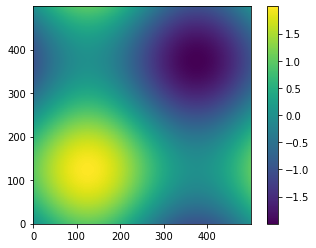

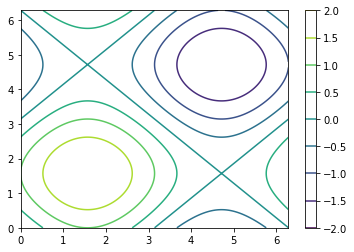

In [50]:
plt.figure('plot 2d func value')
plt.imshow(z, origin='lower', interpolation='none')
plt.colorbar()

plt.figure('plot 2d func contour')
plt.contour(points_x, points_y, z)
plt.colorbar()
plt.show()